<a href="https://colab.research.google.com/github/SergeiSa/Computational-Intelligence-Slides-Fall-2020/blob/master/Google%20Colab%20notebooks/practice_06/LMI_SDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cvxpy

In [ ]:
import cvxpy as cp
import numpy as np
import scipy as sc

In [ ]:
# Construct the problem.
n = 3

A = np.random.randn(n,n) - 10*np.eye(n)
Q = np.eye(n)

P = cp.Variable((n,n))
# Q =
objective = cp.Minimize(0)
constraints = [P >> 0,
               P.T == P, 
               A.T@P + P@A + Q <<0]

prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
prob.solve()
if prob.status is 'infeasible':
    print('System is unstable')
else:
    # print("Problem status:", prob.status)
    print("Objective value:", prob.value)
    print(P.value)
    print('System is stable')

w, v = np.linalg.eig(A)
print('Eigen values are:')
print(w)

Objective value: 0.0
[[ 0.10982602 -0.00121037 -0.00497226]
 [-0.00121037  0.09148092 -0.00741401]
 [-0.00497226 -0.00741401  0.08306554]]
System is stable
Eigen values are:
[ -7.39147068  -9.82193743 -11.8324466 ]


WARN: m less than n, problem likely degenerate
optimal
Eigen values: [-2.51768147e+03+0.j        -5.58759904e+02+0.j
 -1.37691797e+00+1.8992778j -1.37691797e+00-1.8992778j]


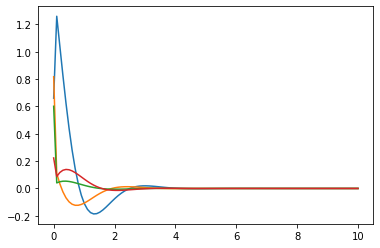

In [ ]:
n = 4
m = 3
A = np.random.randn(n,n)
B = np.random.randn(n,m) 
Q = np.eye(n)

# Construct the problem.
P = cp.Variable((n,n))
Z = cp.Variable((m,n))

objective = cp.Minimize(0)
constraints = [P >> 0, 
               A@P + P@A.T + B@Z + Z.T @ B.T + Q<<0]

prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
prob.solve()
print(prob.status)

K = Z.value@ np.linalg.inv(P.value)


w, v = np.linalg.eig(A + B@K)

print(f'Eigen values: {w}')

def sys(x, t):
    dx = (A + B@K)@x
    return dx

t = np.linspace(0, 10, 100)
x0 = np.random.rand(n)
import scipy.integrate as integrator 
x_sol = integrator.odeint(sys,x0, t)


import matplotlib.pyplot as plt

plt.plot(t, x_sol)
plt.show()
